# Light example: generate influence diagram

- 1 light + 1 switch
- normal operation and so highest chance: light is on and switch set to on
- both components have a health variable
- light 1 can be tested with 2 tests
  - test 1 is cheapest test
  - test 2 is more expensive
- when test 2 negative then replace component
- switch can be tested with 1 test 
- 

this notebook generates the influence diagram

In [1]:
# imports
import os
import matplotlib.pyplot as plt
from pylab import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display,HTML

In [2]:
# create influence diagram
diag = gum.InfluenceDiagram()

# influence diagram structure

chance, decision and utility variables

CL1: light 1 
- normal behavior is light 1 is on 
- but can also be off

HL1: light 1 health 
- models if light is broken. 
- If HL1 set to broken light 1 will be off. 
- So light 1 is conditionally dependent on L1H

In [3]:
# CL1 and HL1
CL1 = diag.addChanceNode(gum.LabelizedVariable('CL1', 'L1 component', ["on", "off"]))
HL1 = diag.addChanceNode(gum.LabelizedVariable('HL1', 'L1 health', ["ok", "broken"]))

# CL1 is conditionally dependent on L1H
diag.addArc(HL1, CL1)

CS1: toggle for light 1
- since CL1 normally on CS1 also normally on
- when off CL1 should be off
- when off but CL1 on: weird situation
- when on but CL1 off: probably broken
- CL1 is conditionally dependent on CS1 

In [4]:
# CS1 and HS1
CS1 = diag.addChanceNode(gum.LabelizedVariable('CS1', 'S1 component', ["on", "off"]))
HS1 = diag.addChanceNode(gum.LabelizedVariable('HS1', 'S1 health', ['ok', 'broken']))

# L1 is dependent on S1
diag.addArc(CS1, CL1)
diag.addArc(HS1, CS1)

DT1: test 1
- decision variable test 1 determines if test 1 will be performed
- values are yes / no
- if L1H is likely broken DT1 becomes relevant

RT1: test result of test 1
- chance variable test 1 result models outcome of test 1: OK, not OK
- not done is also an option if DT1 set to no

UT1: utility of test 1
- function of L1H and DT1 
- when low health it's likely to perform test for more assurance

In [5]:
DT1 = diag.addDecisionNode(gum.LabelizedVariable('DT1', 'Decide T1', ["yes", "no"]))
RT1 = diag.addChanceNode(gum.LabelizedVariable('RT1', 'Result T1', ["not done", "OK", "broken"]))
UT1 = diag.addUtilityNode(gum.LabelizedVariable("UT1", "R(L1H, DT1)", 1))

In [6]:
diag.addArc(HL1, DT1)
diag.addArc(HL1, UT1)
diag.addArc(DT1, UT1)
diag.addArc(DT1, RT1)

DT2 test 2
- decision variable test 2 determines if test 2 will be performed
- values are yes / no
- if L1H is likely broken DT1 becomes relevant

RT2: test result of test 2
- chance variable test 2 result models outcome of test 2: OK, not OK
- not done is also an option if DT2 set to no

UT2: utility of test 1
- function of RT1 and DT2 
- when low health it's likely to perform test for more assurance

In [7]:
DT2 = diag.addDecisionNode(gum.LabelizedVariable('DT2', 'Decide T2', ["yes", "no"]))
RT2 = diag.addChanceNode(gum.LabelizedVariable('RT2', 'Result T2', ["not done", "OK", "broken"]))
UT2 = diag.addUtilityNode(gum.LabelizedVariable("UT2", "R(L1H, DT2)", 1))

In [8]:
diag.addArc(RT1, DT2)
diag.addArc(DT2, UT2)
diag.addArc(RT1, UT2)
diag.addArc(DT2, RT2)

DS1T1 test 1
- decision variable S1 test 1 determines if test 1 will be performed
- values are yes / no
- if S1H is likely broken DS1T1 becomes relevant

RS1T1: test result of S1 test 1
- chance variable test 1 result models outcome of test 1: OK, not OK
- not done is also an option if DS1T2 set to no

S1UT1: utility for test 1 of L1 and S1
- function of DT1, DS1T1 and S1H and L1H 
- when low health it's likely to perform test for more assurance

In [9]:
DS1T1 = diag.addDecisionNode(gum.LabelizedVariable('DS1T1', 'Decide S1 T1', ["yes", "no"]))
RS1T1 = diag.addChanceNode(gum.LabelizedVariable('RS1T1', 'Result S1 T1', ["not done", "OK", "broken"]))
S1UT1 = diag.addUtilityNode(gum.LabelizedVariable("S1UT1", "R(S1H, S1DT1)", 1))

In [10]:
diag.addArc(DS1T1, RS1T1)
diag.addArc(HS1, S1UT1)
diag.addArc(DS1T1, S1UT1)
diag.addArc(HS1, DS1T1)

DRL1: decision on replacement of component 1
- yes when output RT2 = broken
- no otherwise

URL1: utility steering decision to replace component
- input RT2 test to indicate if CL1 is broken

In [11]:
DRL1 = diag.addDecisionNode(gum.LabelizedVariable('DRL1', 'L1 replacement decision', ["yes", "no"]))
URL1 = diag.addUtilityNode(gum.LabelizedVariable("URL1", "R(RT2, DRL1)", 1))

diag.addArc(RT2, DRL1)
diag.addArc(DRL1, URL1)
diag.addArc(RT2, URL1)


Influence Diagram{
  chance: 7,
  utility: 4,
  decision: 4,
  arcs: 18,
  domainSize: 6912
}


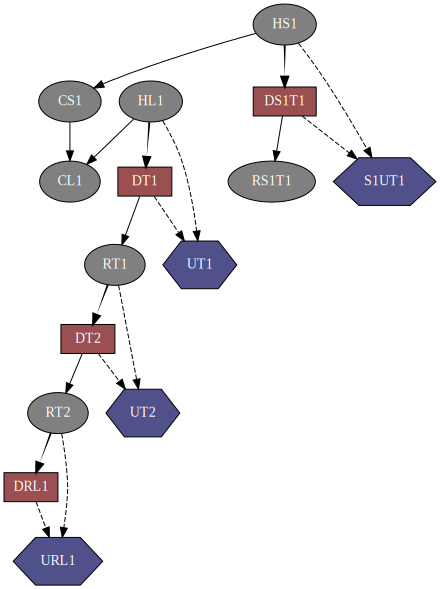

In [12]:
print(diag)
gnb.showInfluenceDiagram(diag, size=60)

# probabilities

In [ ]:
# CL1 and test 1
diag.cpt(CL1)[{"CS1": 0, "HL1":0}] = [0.95, 0.05]  # when S1:on, L1H: healthy > L1 should be on
diag.cpt(CL1)[{"CS1": 0, "HL1":1}] = [0.1, 0.9]  # when S1:on, L1H: broken > L1 likely off
diag.cpt(CL1)[{"CS1": 1, "HL1":0}] = [0.05, 0.95]  # when S1:off, L1H: healthy > L1 is off
diag.cpt(CL1)[{"CS1": 1, "HL1":1}] = [0.01, 0.99] # when S1:off, L1H: broken > L1 likely off


diag.cpt(HL1)[0] = 0.7  # most likely light is not broken
diag.cpt(HL1)[1] = 0.3  # but 30% chance light is broken

diag.cpt(RT1)[{"DT1": 0}] = [0.0, 0.8, 0.2] # when DT1:yes > most likely RT1 is OK
diag.cpt(RT1)[{"DT1": 1}] = [0.95, 0.05,0.0] # when DT1:no > very likely not done

In [ ]:
# CL1 and test 2
diag.cpt(RT2)[{"DT2": 0}] = [0, 0.2, 0.8]  # when DT2:yes > RT2 most likely broken after T1
diag.cpt(RT2)[{"DT2": 1}] = [1.0, 0.0, 0]  # when DT2:no > RT2 should not have a result


In [ ]:
gnb.flow.row(diag.cpt(CL1),
            diag.cpt(HL1),
            diag.cpt(RT1),
            diag.cpt(RT2),
            captions=[  "prior of CL1",
                        "prior of HL1",
                        "prior of RT1",
                        "prior of RT2"
                      ])

In [ ]:
diag.cpt(CS1)[{'HS1':0}] = [0.7, 0.3] # normal behavior light is on
diag.cpt(CS1)[{'HS1':1}] = [0.5, 0.5] # if broken it could be stuck in on or off

diag.cpt(HS1)[0] = 0.90
diag.cpt(HS1)[1] = 0.1 # very small chance the switch is broken

diag.cpt(RS1T1)[{"DS1T1":0}] = [0,0.4,0.6]  # when Decision to test = yes > probably broken
diag.cpt(RS1T1)[{"DS1T1":1}] = [1,0,0]      # when Decision no > no result



In [ ]:
gnb.flow.row(diag.cpt(CS1),
            diag.cpt(HS1),
            diag.cpt(RS1T1),
            
            captions=[  "prior of CS1",
                        "prior of HS1",
                        "prior of RS1T1"
            
                      ])

# utility function

In [ ]:
diag.utility("UT1")[{"DT1": 0, "HL1":0}] = -100 # no test necessary when in good health
diag.utility("UT1")[{"DT1": 0, "HL1":1}] = -1   # test relevant
diag.utility("UT1")[{"DT1": 1, "HL1":0}] = -10  # no test needed
diag.utility("UT1")[{"DT1": 1, "HL1":1}] = -30  # not a good option not to test when brokeen

In [ ]:
diag.utility("UT2")[{"RT1": 0, "DT2":0}] = -100 # when DT2 yes should have a result so not a logical result
diag.utility("UT2")[{"RT1": 0, "DT2":1}] = -10 # when DT2 no it's logical no result

diag.utility("UT2")[{"RT1": 1, "DT2":0}] = -100 # when DT2 yes AND RT1 OK > not logical
diag.utility("UT2")[{"RT1": 1, "DT2":1}] = -10 # when DT2 no AND RT1 OK > logical

diag.utility("UT2")[{"RT1": 2, "DT2":0}] = -0 # DT2 yes when RT1 broken is logical 
diag.utility("UT2")[{"RT1": 2, "DT2":1}] = -20 # DT2 no when RT1 broken not logical

In [ ]:
diag.utility("S1UT1")[{"DS1T1": 0, "HS1":0}] = -50 # no test necessary when in good health
diag.utility("S1UT1")[{"DS1T1": 0, "HS1":1}] = -1   # test relevant
diag.utility("S1UT1")[{"DS1T1": 1, "HS1":0}] = -10  # no test needed
diag.utility("S1UT1")[{"DS1T1": 1, "HS1":1}] = -30  # not a good option not to test when brokeen

In [ ]:
diag.utility("URL1")[{"RT2":"not done", "DRL1":"yes"}] = -200   # when T2 not done and decision to replace yes
diag.utility("URL1")[{"RT2":"not done", "DRL1":"no"}]  = -100   # when T2 not done and decision to replace no
diag.utility("URL1")[{"RT2":"OK"      , "DRL1":"yes"}] = -300   # when T2 OK and decision to replace yes
diag.utility("URL1")[{"RT2":"OK"      , "DRL1":"no"}]  = -100   # when T2 OK and decision to replace no
diag.utility("URL1")[{"RT2":"broken"  , "DRL1":"yes"}] =  0     # when T2 broken and decision to replace yes
diag.utility("URL1")[{"RT2":"broken"  , "DRL1":"no"}]  = -100   # when T2 broken and decision to replace no


In [ ]:
gnb.flow.row(diag.utility("UT1"),
            diag.utility("UT2"),
            diag.utility("S1UT1"),
            diag.utility("URL1"),
           
            captions=[  "utility UT1",
                        "utility UT2",
                        "utility S1UT1",
                        "utility URL1"                      
            
                      ])

In [ ]:
diag.saveBIFXML("lightv2.xml")